In [1]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import OneHotEncoder

#estimators
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model

#model metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

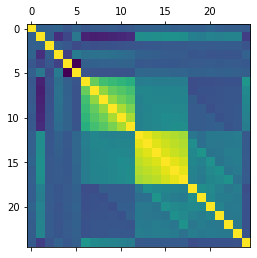

In [3]:
rawData.info()
print(rawData.corr())
plt.matshow(rawData.corr())

In [4]:
#features
features = rawData.iloc[:,1:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [5]:
#class sklearn.preprocessing.OneHotEncoder(categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, 
#                                          handle_unknown='error')
ohe = OneHotEncoder()
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(), ['SEX', 'EDUCATION', 'MARRIAGE']),
    remainder = 'passthrough')
features = column_trans.fit_transform(features)

C:\Users\khowa\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(features)
features = pd.DataFrame(x_scaled)
#print(features)

In [7]:
from sklearn.pipeline import make_pipeline

In [8]:
U, s, Vh = np.linalg.svd(features, full_matrices=False) 
print(np.shape(U), np.shape(s), np.shape(Vh)) 
#print(s)
#print(U)
#print(Vh)

(30000, 33) (33,) (33, 33)


In [9]:
np.set_printoptions(precision=2, suppress=True)
print(s)

[238.55 125.91 118.56 107.25  76.8   39.46  25.18  23.34  20.36  18.2
  16.59  15.47  12.79  12.02  10.44   8.98   8.13   7.55   7.37   6.34
   5.73   5.48   4.23   3.97   3.59   3.21   2.68   2.07   1.81   1.47
   1.07   0.     0.  ]


In [10]:
#The first 7 columns of U are the most meaningful 76% 
US = pd.DataFrame(np.dot(U[:,1:7], np.diag(s[1:7])))
print(np.shape(US))
Vhdf = pd.DataFrame(Vh[1:7,1:7])
print(np.shape(Vhdf))
Udf = pd.DataFrame(np.dot(US, Vhdf))
print(np.shape(Udf))

(30000, 6)
(6, 6)
(30000, 6)


In [11]:
np.set_printoptions(precision=2)
print(Udf)

              0         1         2         3         4         5
0      0.344092 -0.001108 -0.345315  0.497268 -0.149265 -0.009326
1      0.282210 -0.000421 -0.385831  0.434906 -0.167864 -0.003259
2      0.293263 -0.000133 -0.386519  0.439714 -0.153757 -0.001236
3      0.311905 -0.000721 -0.374440  0.458659 -0.152786 -0.004102
4     -0.602652  0.000065 -0.339330  0.518002 -0.113436 -0.001354
...         ...       ...       ...       ...       ...       ...
29995 -0.503651  0.000686 -0.277402 -0.406527  0.864274  0.004892
29996 -0.485073  0.001161 -0.270246 -0.391668  0.889501  0.004772
29997 -0.661641 -0.000241 -0.360237  0.477134 -0.130199 -0.004934
29998 -0.480867  0.000339 -0.262808 -0.381966  0.885442  0.000395
29999 -0.609112 -0.000200 -0.335717  0.518222 -0.126974 -0.003412

[30000 rows x 6 columns]


In [12]:
#dependent variable
depVar = rawData['default payment next month']

In [13]:
X,y = Udf, depVar

In [14]:
X_train, X_test, y_train, y_test = train_test_split( Udf, y, test_size=0.25, random_state=5)

In [15]:
X_train.shape, X_test.shape

((22500, 6), (7500, 6))

In [16]:
# fit a CART model to the data
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)
print(modelDTC)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [18]:
# make predictions
expectedDTC = y_test
predictedDTC = modelDTC.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedDTC, predictedDTC))
print(metrics.confusion_matrix(expectedDTC, predictedDTC))
kappaDTC = metrics.cohen_kappa_score(expectedDTC, predictedDTC)
print('Test Accuracy: %.3f' % modelDTC.score(X_test,y_test))
print('Test Kappa = %.3f' % kappaDTC)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      5841
           1       0.36      0.37      0.36      1659

    accuracy                           0.72      7500
   macro avg       0.59      0.59      0.59      7500
weighted avg       0.72      0.72      0.72      7500

[[4756 1085]
 [1051  608]]
Test Accuracy: 0.715
Test Kappa = 0.179


In [19]:
kNN = KNeighborsClassifier(n_neighbors=5, p=2) 
kNN.fit(X_train, y_train)
print('Training Accuracy: %.3f' % kNN.score(X_train,y_train) )

# make predictions
expectedKNN = y_test
predictedKNN = kNN.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expectedKNN, predictedKNN))
print(metrics.confusion_matrix(expectedKNN, predictedKNN))
print('Test Accuracy: %.3f' % kNN.score(X_test,y_test) )
kappaKNN = metrics.cohen_kappa_score(expectedKNN, predictedKNN)
print('Test Kappa = %.3f' % kappaKNN)

Training Accuracy: 0.836
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      5841
           1       0.50      0.28      0.36      1659

    accuracy                           0.78      7500
   macro avg       0.66      0.60      0.61      7500
weighted avg       0.75      0.78      0.75      7500

[[5377  464]
 [1195  464]]
Test Accuracy: 0.779
Test Kappa = 0.238


In [20]:
kNN = KNeighborsClassifier(n_neighbors=3, p=2) 
kNN.fit(X_train, y_train)
print('Training Accuracy: %.3f' % kNN.score(X_train,y_train) )
# make predictions
expectedKNN = y_test
predictedKNN = kNN.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedKNN, predictedKNN))
print(metrics.confusion_matrix(expectedKNN, predictedKNN))
kappaKNN = metrics.cohen_kappa_score(expectedKNN, predictedKNN)
print('Test Accuracy: %.3f' % kNN.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaKNN)

Training Accuracy: 0.859
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      5841
           1       0.46      0.30      0.36      1659

    accuracy                           0.77      7500
   macro avg       0.64      0.60      0.61      7500
weighted avg       0.74      0.77      0.75      7500

[[5250  591]
 [1158  501]]
Test Accuracy: 0.767
Test Kappa = 0.229


In [21]:
kNN = KNeighborsClassifier(n_neighbors=1, p=2) 
kNN.fit(X_train, y_train)
print('Training Accuracy: %.3f' % kNN.score(X_train,y_train) )
# make predictions
expectedKNN = y_test
predictedKNN = kNN.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedKNN, predictedKNN))
print(metrics.confusion_matrix(expectedKNN, predictedKNN))
kappaKNN = metrics.cohen_kappa_score(expectedKNN, predictedKNN)
print('Test Accuracy: %.3f' % kNN.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaKNN)

Training Accuracy: 1.000
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      5841
           1       0.38      0.35      0.37      1659

    accuracy                           0.73      7500
   macro avg       0.60      0.59      0.60      7500
weighted avg       0.72      0.73      0.72      7500

[[4872  969]
 [1072  587]]
Test Accuracy: 0.728
Test Kappa = 0.192


In [22]:
kNN = KNeighborsClassifier(n_neighbors=2, p=2) 
kNN.fit(X_train, y_train)
print('Training Accuracy: %.3f' % kNN.score(X_train,y_train) )
# make predictions
expectedKNN = y_test
predictedKNN = kNN.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedKNN, predictedKNN))
print(metrics.confusion_matrix(expectedKNN, predictedKNN))
kappaKNN = metrics.cohen_kappa_score(expectedKNN, predictedKNN)
print('Test Accuracy: %.3f' % kNN.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaKNN)

Training Accuracy: 0.858
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      5841
           1       0.52      0.16      0.25      1659

    accuracy                           0.78      7500
   macro avg       0.66      0.56      0.56      7500
weighted avg       0.74      0.78      0.73      7500

[[5586  255]
 [1386  273]]
Test Accuracy: 0.781
Test Kappa = 0.160


In [23]:
kNN = KNeighborsClassifier(n_neighbors=4, p=2) 
kNN.fit(X_train, y_train)
print('Training Accuracy: %.3f' % kNN.score(X_train,y_train) )
# make predictions
expectedKNN = y_test
predictedKNN = kNN.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedKNN, predictedKNN))
print(metrics.confusion_matrix(expectedKNN, predictedKNN))
kappaKNN = metrics.cohen_kappa_score(expectedKNN, predictedKNN)
print('Test Accuracy: %.3f' % kNN.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaKNN)

Training Accuracy: 0.834
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      5841
           1       0.53      0.19      0.28      1659

    accuracy                           0.78      7500
   macro avg       0.67      0.57      0.58      7500
weighted avg       0.75      0.78      0.74      7500

[[5569  272]
 [1347  312]]
Test Accuracy: 0.784
Test Kappa = 0.184


In [24]:
kNN = KNeighborsClassifier(n_neighbors=3, p=1) 
kNN.fit(X_train, y_train)
print('Training Accuracy: %.3f' % kNN.score(X_train,y_train) )

# make predictions
expectedKNN = y_test
predictedKNN = kNN.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expectedKNN, predictedKNN))
print(metrics.confusion_matrix(expectedKNN, predictedKNN))
kappaKNN = metrics.cohen_kappa_score(expectedKNN, predictedKNN)
print('Test Accuracy: %.3f' % kNN.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaKNN)

Training Accuracy: 0.858
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      5841
           1       0.47      0.31      0.37      1659

    accuracy                           0.77      7500
   macro avg       0.64      0.60      0.61      7500
weighted avg       0.74      0.77      0.75      7500

[[5259  582]
 [1151  508]]
Test Accuracy: 0.769
Test Kappa = 0.235


In [25]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
#learningSVC = SVC(kernel = 'linear', class_weight='balanced', random_state=2020)
#search_space = {'C': [0.1, 1, 10, 100]}
#gridsearch = GridSearchCV(learningSVC, param_grid=search_space,scoring='accuracy',refit=True, cv=3)
#gridsearch.fit(X_train, y_train)

In [26]:
#Random Forest Classifier
modelRF = RandomForestClassifier(max_depth=34, random_state=2020)
#Train
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train)) 

# make predictions
expectedRF = y_test
predictedRF = modelRF.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expectedRF, predictedRF))
print(metrics.confusion_matrix(expectedRF, predictedRF))
kappaRF = metrics.cohen_kappa_score(expectedRF, predictedRF)
print('Test Accuracy: %.3f' % modelRF.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaRF)

C:\Users\khowa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\khowa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.78 0.78 0.78]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5841
           1       0.52      0.28      0.37      1659

    accuracy                           0.78      7500
   macro avg       0.67      0.60      0.62      7500
weighted avg       0.75      0.78      0.76      7500

[[5413  428]
 [1193  466]]
Test Accuracy: 0.784
Test Kappa = 0.249


In [27]:
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 

# make predictions
expectedLR = y_test
predictedLR = modelLR.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expectedLR, predictedLR))
print(metrics.confusion_matrix(expectedLR, predictedLR))
kappaLR = metrics.cohen_kappa_score(expectedLR, predictedLR)
print('Test Accuracy: %.3f' % modelLR.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaLR)

C:\Users\khowa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khowa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\khowa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khowa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khowa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to

[0.78 0.78 0.78]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5841
           1       0.77      0.01      0.02      1659

    accuracy                           0.78      7500
   macro avg       0.78      0.50      0.45      7500
weighted avg       0.78      0.78      0.69      7500

[[5836    5]
 [1642   17]]
Test Accuracy: 0.780
Test Kappa = 0.015


In [28]:
modelGNB = GaussianNB()
modelGNB.fit(X_train,y_train)

# make predictions
expectedGNB = y_test
predictedGNB = modelGNB.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expectedGNB, predictedGNB))
print(metrics.confusion_matrix(expectedGNB, predictedGNB))
kappaGNB = metrics.cohen_kappa_score(expectedGNB, predictedGNB)
print('Test Accuracy: %.3f' % modelGNB.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaGNB)

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      5841
           1       0.58      0.09      0.15      1659

    accuracy                           0.78      7500
   macro avg       0.69      0.53      0.51      7500
weighted avg       0.75      0.78      0.72      7500

[[5740  101]
 [1517  142]]
Test Accuracy: 0.784
Test Kappa = 0.098


In [29]:
modelGBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=10, random_state=0)
modelGBC.fit(X_train,y_train)

# make predictions
expectedGBC = y_test
predictedGBC = modelGBC.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expectedGBC, predictedGBC))
print(metrics.confusion_matrix(expectedGBC, predictedGBC))
kappaGBC = metrics.cohen_kappa_score(expectedGBC, predictedGBC)
print('Test Accuracy: %.3f' % modelGBC.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaGBC)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      5841
           1       0.43      0.31      0.36      1659

    accuracy                           0.75      7500
   macro avg       0.62      0.60      0.60      7500
weighted avg       0.73      0.75      0.74      7500

[[5144  697]
 [1141  518]]
Test Accuracy: 0.755
Test Kappa = 0.213


In [30]:
#Make Predictions
predictions = modelGNB.predict(X_test)
#predRsquared = r2_score(y_test,predictions)
#rmse = sqrt(mean_squared_error(y_test, predictions))
#print('R Squared: %.3f' % predRsquared)
#print('RMSE: %.3f' % rmse)

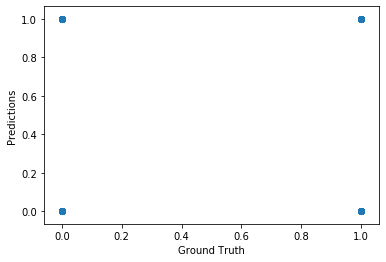

In [31]:
#Not so meaningful unless weights are shown
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [34]:
from sklearn.neural_network import MLPClassifier
modelMLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
modelMLP.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5841
           1       0.00      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500

[[5841    0]
 [1659    0]]
Test Accuracy: 0.779
Test Kappa = 0.000


C:\Users\khowa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
modelMLP = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=400, hidden_layer_sizes=(4, 2), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5841
           1       0.68      0.17      0.27      1659

    accuracy                           0.80      7500
   macro avg       0.74      0.57      0.57      7500
weighted avg       0.78      0.80      0.75      7500

[[5711  130]
 [1384  275]]
Test Accuracy: 0.798
Test Kappa = 0.197


In [37]:
modelMLP = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=800, hidden_layer_sizes=(4, 2), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      5841
           1       0.68      0.17      0.27      1659

    accuracy                           0.80      7500
   macro avg       0.74      0.57      0.58      7500
weighted avg       0.78      0.80      0.75      7500

[[5711  130]
 [1383  276]]
Test Accuracy: 0.798
Test Kappa = 0.198


In [38]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-5, max_iter=800, hidden_layer_sizes=(4, 2), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5841
           1       0.65      0.21      0.32      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.59      0.60      7500
weighted avg       0.78      0.80      0.76      7500

[[5654  187]
 [1304  355]]
Test Accuracy: 0.801
Test Kappa = 0.240


In [39]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-5, max_iter=800, hidden_layer_sizes=(13, 2), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5841
           1       0.00      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500

[[5841    0]
 [1659    0]]
Test Accuracy: 0.779
Test Kappa = 0.000


C:\Users\khowa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-5, max_iter=1600, hidden_layer_sizes=(13, 6), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)


              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.64      0.26      0.37      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.61      0.63      7500
weighted avg       0.78      0.80      0.77      7500

[[5600  241]
 [1224  435]]
Test Accuracy: 0.805
Test Kappa = 0.280


In [41]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=1600, hidden_layer_sizes=(13, 6), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.66      0.24      0.35      1659

    accuracy                           0.80      7500
   macro avg       0.74      0.60      0.62      7500
weighted avg       0.78      0.80      0.77      7500

[[5635  206]
 [1267  392]]
Test Accuracy: 0.804
Test Kappa = 0.261


In [42]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=3200, hidden_layer_sizes=(13, 8), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5841
           1       0.64      0.30      0.40      1659

    accuracy                           0.81      7500
   macro avg       0.73      0.62      0.64      7500
weighted avg       0.78      0.81      0.78      7500

[[5559  282]
 [1167  492]]
Test Accuracy: 0.807
Test Kappa = 0.307


In [43]:
modelMLP = MLPClassifier(solver='sgd', alpha=1e-6, max_iter=3200, hidden_layer_sizes=(13, 8), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5841
           1       0.00      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500

[[5841    0]
 [1659    0]]
Test Accuracy: 0.779
Test Kappa = 0.000


C:\Users\khowa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=3200, hidden_layer_sizes=(8, 5), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.64      0.23      0.34      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.60      0.61      7500
weighted avg       0.78      0.80      0.76      7500

[[5621  220]
 [1272  387]]
Test Accuracy: 0.801
Test Kappa = 0.253


In [45]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=3200, hidden_layer_sizes=(5, 3), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5841
           1       0.68      0.16      0.25      1659

    accuracy                           0.80      7500
   macro avg       0.74      0.57      0.57      7500
weighted avg       0.78      0.80      0.74      7500

[[5716  125]
 [1399  260]]
Test Accuracy: 0.797
Test Kappa = 0.187


In [46]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=3200, hidden_layer_sizes=(8, 3), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.64      0.27      0.38      1659

    accuracy                           0.81      7500
   macro avg       0.73      0.61      0.63      7500
weighted avg       0.78      0.81      0.77      7500

[[5587  254]
 [1206  453]]
Test Accuracy: 0.805
Test Kappa = 0.289


In [47]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=3200, hidden_layer_sizes=(10, 2), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      5841
           1       0.65      0.27      0.38      1659

    accuracy                           0.81      7500
   macro avg       0.74      0.61      0.63      7500
weighted avg       0.78      0.81      0.77      7500

[[5603  238]
 [1211  448]]
Test Accuracy: 0.807
Test Kappa = 0.290


In [48]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(8, 5), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.64      0.23      0.34      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.60      0.61      7500
weighted avg       0.78      0.80      0.76      7500

[[5621  220]
 [1272  387]]
Test Accuracy: 0.801
Test Kappa = 0.253


In [49]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(8, 5), random_state=2)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5841
           1       0.65      0.19      0.29      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.58      0.59      7500
weighted avg       0.77      0.80      0.75      7500

[[5673  168]
 [1348  311]]
Test Accuracy: 0.798
Test Kappa = 0.213


In [50]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(8, 5), random_state=3)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5841
           1       0.69      0.08      0.14      1659

    accuracy                           0.79      7500
   macro avg       0.74      0.53      0.51      7500
weighted avg       0.77      0.79      0.72      7500

[[5783   58]
 [1530  129]]
Test Accuracy: 0.788
Test Kappa = 0.099


In [51]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(8, 5))
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5841
           1       0.65      0.20      0.31      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.59      0.60      7500
weighted avg       0.78      0.80      0.76      7500

[[5664  177]
 [1323  336]]
Test Accuracy: 0.800
Test Kappa = 0.229


In [52]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(8, 5), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.64      0.23      0.34      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.60      0.61      7500
weighted avg       0.78      0.80      0.76      7500

[[5621  220]
 [1272  387]]
Test Accuracy: 0.801
Test Kappa = 0.253


In [53]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(8, 5, 3), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.64      0.28      0.39      1659

    accuracy                           0.81      7500
   macro avg       0.73      0.62      0.64      7500
weighted avg       0.78      0.81      0.77      7500

[[5582  259]
 [1197  462]]
Test Accuracy: 0.806
Test Kappa = 0.294


In [54]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(13, 8, 5), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.65      0.26      0.37      1659

    accuracy                           0.81      7500
   macro avg       0.74      0.61      0.63      7500
weighted avg       0.78      0.81      0.77      7500

[[5610  231]
 [1230  429]]
Test Accuracy: 0.805
Test Kappa = 0.279


In [55]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(8, 5), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.64      0.23      0.34      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.60      0.61      7500
weighted avg       0.78      0.80      0.76      7500

[[5621  220]
 [1272  387]]
Test Accuracy: 0.801
Test Kappa = 0.253


In [56]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(7, 5), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5841
           1       0.67      0.20      0.31      1659

    accuracy                           0.80      7500
   macro avg       0.74      0.59      0.60      7500
weighted avg       0.78      0.80      0.76      7500

[[5672  169]
 [1323  336]]
Test Accuracy: 0.801
Test Kappa = 0.231


In [57]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(6, 5), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.65      0.26      0.37      1659

    accuracy                           0.81      7500
   macro avg       0.73      0.61      0.63      7500
weighted avg       0.78      0.81      0.77      7500

[[5603  238]
 [1222  437]]
Test Accuracy: 0.805
Test Kappa = 0.283


In [58]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(5, 5), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5841
           1       0.66      0.22      0.33      1659

    accuracy                           0.80      7500
   macro avg       0.74      0.60      0.61      7500
weighted avg       0.78      0.80      0.76      7500

[[5646  195]
 [1286  373]]
Test Accuracy: 0.803
Test Kappa = 0.250


In [59]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(21, 13), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5841
           1       0.64      0.27      0.38      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.61      0.63      7500
weighted avg       0.78      0.80      0.77      7500

[[5587  254]
 [1217  442]]
Test Accuracy: 0.804
Test Kappa = 0.281


In [60]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(3, 2), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5841
           1       0.69      0.10      0.17      1659

    accuracy                           0.79      7500
   macro avg       0.74      0.54      0.53      7500
weighted avg       0.77      0.79      0.72      7500

[[5767   74]
 [1494  165]]
Test Accuracy: 0.791
Test Kappa = 0.125


In [61]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(13), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5841
           1       0.69      0.13      0.21      1659

    accuracy                           0.79      7500
   macro avg       0.74      0.56      0.55      7500
weighted avg       0.77      0.79      0.73      7500

[[5746   95]
 [1449  210]]
Test Accuracy: 0.794
Test Kappa = 0.156


In [62]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(8), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5841
           1       0.70      0.15      0.24      1659

    accuracy                           0.80      7500
   macro avg       0.75      0.56      0.56      7500
weighted avg       0.78      0.80      0.74      7500

[[5737  104]
 [1418  241]]
Test Accuracy: 0.797
Test Kappa = 0.178


In [63]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(5), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5841
           1       0.71      0.10      0.17      1659

    accuracy                           0.79      7500
   macro avg       0.75      0.54      0.53      7500
weighted avg       0.78      0.79      0.72      7500

[[5774   67]
 [1494  165]]
Test Accuracy: 0.792
Test Kappa = 0.127


In [64]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-6, max_iter=6400, hidden_layer_sizes=(8, 2), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      5841
           1       0.72      0.12      0.20      1659

    accuracy                           0.79      7500
   macro avg       0.76      0.55      0.54      7500
weighted avg       0.78      0.79      0.73      7500

[[5764   77]
 [1462  197]]
Test Accuracy: 0.795
Test Kappa = 0.151


In [65]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-7, max_iter=6400, hidden_layer_sizes=(8, 5), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5841
           1       0.63      0.28      0.39      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.62      0.64      7500
weighted avg       0.78      0.80      0.77      7500

[[5570  271]
 [1193  466]]
Test Accuracy: 0.805
Test Kappa = 0.293


In [66]:
modelMLP = MLPClassifier(solver='adam', alpha=1e-7, max_iter=6400, hidden_layer_sizes=(8, 8), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5841
           1       0.66      0.15      0.25      1659

    accuracy                           0.80      7500
   macro avg       0.73      0.56      0.56      7500
weighted avg       0.77      0.80      0.74      7500

[[5713  128]
 [1407  252]]
Test Accuracy: 0.795
Test Kappa = 0.180


In [67]:
modelMLP = MLPClassifier(solver='adam', learning_rate_init = 0.0005, alpha=1e-7, max_iter=6400, hidden_layer_sizes=(8, 5), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5841
           1       0.66      0.23      0.34      1659

    accuracy                           0.80      7500
   macro avg       0.74      0.60      0.61      7500
weighted avg       0.78      0.80      0.76      7500

[[5646  195]
 [1283  376]]
Test Accuracy: 0.803
Test Kappa = 0.253


In [68]:
modelMLP = MLPClassifier(solver='adam', learning_rate_init = 0.0001, alpha=1e-7, max_iter=6400, hidden_layer_sizes=(8, 5), random_state=1)
modelMLP.fit(X_train, y_train)
# make predictions
expectedMLP = y_test
predictedMLP = modelMLP.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expectedMLP, predictedMLP))
print(metrics.confusion_matrix(expectedMLP, predictedMLP))
kappaMLP = metrics.cohen_kappa_score(expectedMLP, predictedMLP)
print('Test Accuracy: %.3f' % modelMLP.score(X_test,y_test) )
print('Test Kappa = %.3f' % kappaMLP)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5841
           1       0.00      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500

[[5841    0]
 [1659    0]]
Test Accuracy: 0.779
Test Kappa = 0.000


C:\Users\khowa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
